In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("laptop_details.csv")
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [4]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [5]:
df[df.isnull().any(axis=1)]


,Product,Rating,MRP,Feature
15,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
41,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
56,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
70,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
...,...,...,...,...
705,ASUS ROG Flow X16 (2022) with 90Whr Battery Ry...,NaN,"₹1,71,990",AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAM6...
709,ASUS ROG Flow X13 (2022) Ryzen 9 Octa Core 690...,NaN,"₹1,51,990",AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...
712,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2...,NaN,"₹2,33,990",Intel Core i7 Processor (10th Gen)16 GB LPDDR3...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...


<Axes: >

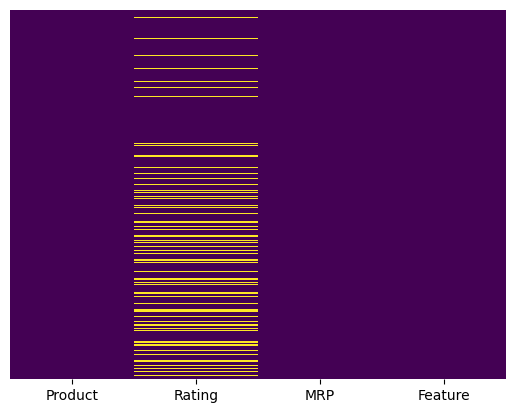

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap="viridis")

In [7]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Product     0.000000
Rating     19.305556
MRP         0.000000
Feature     0.000000
dtype: float64

In [9]:
df.drop("Rating", axis=1, inplace=True)


In [10]:
df.duplicated().sum()

299

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


## Data Cleaning & Feature Extraction

In [14]:
df['Company'] = df['Product'].str.extract(r"^(.+?)\s")
df['Processor'] = df['Feature'].str.extract(r'^(.*?)(?= Processor)')
df['RAM'] = df['Feature'].str.extract(r'(\d+ GB [A-Za-z0-9\s]+ RAM)')
df['OS'] = df['Feature'].str.extract(r'RAM(.*?)(?=Operating System)')
df['Storage_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]) if "SSD" in x else int(re.findall(r'\d+', x.split('SSD')[0])[-1]) * 1024 if "TB" and "SSD" in x else None)
df['Display'] = df['Feature'].str.extract(r'SSD(.*?)(?=Display)')
df['Warranty'] = df['Feature'].str.extract(r'Display(.*)', expand=False)
df["Storage_type"] = df['Product'].apply(lambda x: "SSD" if 'SSD'in x else "HDD")


C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2140075593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company'] = df['Product'].str.extract(r"^(.+?)\s")
C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2140075593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor'] = df['Feature'].str.extract(r'^(.*?)(?= Processor)')
C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2140075593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [15]:
df['Storage_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]) if "SSD" in x else None)

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\4065272237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]) if "SSD" in x else None)


In [16]:
df['Storage_Size']

0      256.0
1      512.0
2      512.0
3      512.0
4      512.0
       ...  
713    512.0
714    512.0
715      NaN
718    512.0
719    256.0
Name: Storage_Size, Length: 421, dtype: float64

In [17]:
df

,Product,MRP,Feature,Company,Processor,RAM,OS,Storage_Size,Display,Warranty,Storage_type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,8 GB DDR4 RAM,64 bit Windows 11,256.0,35.56 cm (14 inch),Office Home and Student 20212 Year Onsite�Warr...,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,8 GB DDR4 RAM,64 bit Windows 11,512.0,39.62 cm (15.6 inch),Office Home and Student 20212 Year Onsite�Warr...,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,8 GB DDR4 RAM,64 bit Windows 11,512.0,39.62 cm (15.6 inch),Office Home and Student 20211 Year Onsite Warr...,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,8 GB DDR4 RAM,64 bit Windows 10,512.0,39.62 cm (15.6 inch),"HP Documentation, HP e-service, HP BIOS Recove...",SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,8 GB DDR4 RAM,Windows 11,512.0,39.62 cm (15.6 inch),1 Year Onsite Warranty,SSD
...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,DELL,Intel Core i5,16 GB DDR5 RAM,64 bit Windows 11,512.0,33.78 cm (13.3 Inch),1 Year Onsite Hardware Service,SSD
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,HP,AMD Ryzen 7 Octa Core,16 GB DDR4 RAM,64 bit Windows 10,512.0,39.62 cm (15.6 inches),"HP Documentation, HP e-service, HP BIOS recove...",SSD
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,4 GB LPDDR4 RAM,Chrome,NaN,NaN,1 Year Onsite Warranty,HDD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,Intel Core i7,16 GB LPDDR5 RAM,64 bit Windows 11,512.0,35.56 cm (14 inch) Touchscreen,1 Year Onsite Warranty,SSD


In [18]:
df.Company.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [19]:
df['MRP'] = df['MRP'].str.replace('₹', '')

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2789440362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP'] = df['MRP'].str.replace('₹', '')


In [20]:
df.isnull().sum()

Product          0
MRP              0
Feature          0
Company          0
Processor        0
RAM              0
OS               0
Storage_Size    23
Display         23
Warranty         0
Storage_type     0
dtype: int64

In [21]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Product         0.000000
MRP             0.000000
Feature         0.000000
Company         0.000000
Processor       0.000000
RAM             0.000000
OS              0.000000
Storage_Size    5.463183
Display         5.463183
Warranty        0.000000
Storage_type    0.000000
dtype: float64

In [22]:
df['MRP'] = pd.to_numeric(df['MRP'].str.replace(',', ''), errors='coerce', downcast='float')

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2857549104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP'] = pd.to_numeric(df['MRP'].str.replace(',', ''), errors='coerce', downcast='float')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       421 non-null    object 
 1   MRP           421 non-null    float32
 2   Feature       421 non-null    object 
 3   Company       421 non-null    object 
 4   Processor     421 non-null    object 
 5   RAM           421 non-null    object 
 6   OS            421 non-null    object 
 7   Storage_Size  398 non-null    float64
 8   Display       398 non-null    object 
 9   Warranty      421 non-null    object 
 10  Storage_type  421 non-null    object 
dtypes: float32(1), float64(1), object(9)
memory usage: 37.8+ KB


In [24]:
df.RAM.unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [25]:
df["RAM_Size"] = df['RAM'].str.extract(r'(.*?)(?=GB)')

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1924343356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RAM_Size"] = df['RAM'].str.extract(r'(.*?)(?=GB)')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       421 non-null    object 
 1   MRP           421 non-null    float32
 2   Feature       421 non-null    object 
 3   Company       421 non-null    object 
 4   Processor     421 non-null    object 
 5   RAM           421 non-null    object 
 6   OS            421 non-null    object 
 7   Storage_Size  398 non-null    float64
 8   Display       398 non-null    object 
 9   Warranty      421 non-null    object 
 10  Storage_type  421 non-null    object 
 11  RAM_Size      421 non-null    object 
dtypes: float32(1), float64(1), object(10)
memory usage: 41.1+ KB


In [27]:
df['RAM_Size'] = pd.to_numeric(df['RAM_Size'].str.replace(',', ''), errors='coerce', downcast='integer')

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2759396554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM_Size'] = pd.to_numeric(df['RAM_Size'].str.replace(',', ''), errors='coerce', downcast='integer')


In [28]:
df['RAM_Gen'] = df['RAM'].str.extract(r'(DDR[0-9L]*|LPDDR[0-9X]*)')

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2374039173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM_Gen'] = df['RAM'].str.extract(r'(DDR[0-9L]*|LPDDR[0-9X]*)')


In [29]:
df['Year_Info'] = df['Warranty'].str.extract(r'(\d+)\s*Year', flags=re.IGNORECASE)

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\4163985375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Info'] = df['Warranty'].str.extract(r'(\d+)\s*Year', flags=re.IGNORECASE)


In [30]:
df["Year_Info"] = df['Year_Info'].str[-1]

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1842235677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year_Info"] = df['Year_Info'].str[-1]


In [31]:
df.drop('RAM', axis=1, inplace=True)

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\911948617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('RAM', axis=1, inplace=True)


In [32]:
df.drop('Warranty', axis=1, inplace=True)

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1336682387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Warranty', axis=1, inplace=True)


In [33]:
df['Year_Info'].unique()

array(['2', '1', '3', nan], dtype=object)

In [34]:
df['Year_Info'] = pd.to_numeric(df['Year_Info'], errors='coerce').astype(pd.Int64Dtype())
df = df.rename(columns={'Year_Info': 'Warranty'})

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\2465365438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Info'] = pd.to_numeric(df['Year_Info'], errors='coerce').astype(pd.Int64Dtype())


In [35]:
df

,Product,MRP,Feature,Company,Processor,OS,Storage_Size,Display,Storage_type,RAM_Size,RAM_Gen,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,256.0,35.56 cm (14 inch),SSD,8,DDR4,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,512.0,39.62 cm (15.6 inch),SSD,8,DDR4,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,512.0,39.62 cm (15.6 inch),SSD,8,DDR4,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,512.0,39.62 cm (15.6 inch),SSD,8,DDR4,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,512.0,39.62 cm (15.6 inch),SSD,8,DDR4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,76590.0,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,DELL,Intel Core i5,64 bit Windows 11,512.0,33.78 cm (13.3 Inch),SSD,16,DDR5,1
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,90000.0,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,HP,AMD Ryzen 7 Octa Core,64 bit Windows 10,512.0,39.62 cm (15.6 inches),SSD,16,DDR4,1
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,Chrome,NaN,NaN,HDD,4,LPDDR4,1
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,Intel Core i7,64 bit Windows 11,512.0,35.56 cm (14 inch) Touchscreen,SSD,16,LPDDR5,1


In [36]:
df.Warranty.unique()

<IntegerArray>
[2, 1, 3, <NA>]
Length: 4, dtype: Int64

In [37]:
##Operating_System
df['OS_Type'] = df['Feature'].apply(lambda x: 'Windows' if 'Windows' in x else'Mac OS' if 'Mac OS' in x else "Windows")

In [38]:
df['Processor_Brand'] = df['Feature'].str.extract(r'^(AMD|Intel|M1|Apple)[\s\w]+Processor')

In [39]:
p= r'^(?:AMD|Intel|M1|Apple)[\s\w]+(?= Processor)'
df['Processor_Type']=df['Feature'].apply(lambda x : re.findall(p, x))

In [40]:
df['Processor_Type']

0                [Intel Core i3]
1                [Intel Core i3]
2                [Intel Core i3]
3        [AMD Ryzen 5 Hexa Core]
4                [Intel Core i5]
                 ...            
713              [Intel Core i5]
714      [AMD Ryzen 7 Octa Core]
715    [Intel Celeron Dual Core]
718              [Intel Core i7]
719              [Intel Core i5]
Name: Processor_Type, Length: 421, dtype: object

In [41]:
df['Processor_Type']=df['Processor_Type'].apply(lambda x : ''.join(x))

In [42]:
df.drop('Processor', axis=1, inplace=True)

In [43]:
df.Display.unique()

array(['35.56 cm (14 inch) ', '39.62 cm (15.6 inch) ',
       'Graphics & Keyboard: Integrated & Standard Keyboard',
       '39.62 cm (15.6 Inch) ', '43.94 cm (17.3 Inch) ',
       '33.78 cm (13.3 inch) ', '35.56 cm (14 Inch) Touchscreen ',
       '35.56 cm (14 Inch) ', '33.78 cm (13.3 Inch) ',
       'Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) TGP Up To 80W',
       '36.07 cm (14.2 inch) ', nan, '34.54 cm (13.6 Inch) ', '',
       '40.64 cm (16 inch) ', '35.56 cm (14 inch) Touchscreen ',
       '40.89 cm (16.1 inch) ', '41.15 cm (16.2 inch) ',
       '43.94 cm (17.3 inch) ', '35.81 cm (14.1 inch) ',
       '33.78 cm (13.3 inch) Touchscreen ', '40.64 cm (16 Inch) ',
       '39.62 cm (15.6 inches) ', '33.78 cm (13.3 Inch) Touchscreen ',
       'Software: Win 11 + Office H&S 2021',
       '34.04 cm (13.4 Inch) Touchscreen ', '88.9 cm (35 cm) ',
       '38.1 cm (15 inch) ', '33.02 cm (13 inch) ',
       '38.0 cm (14.96 Inch) ', '34.29 cm (13.5 inch) ',
       '35.56 cm (14 inches) ', '

In [44]:
df['Display(inches)'] = df['Feature'].str.extract(r'cm \((.*?)(?=inch)').astype('float')

In [45]:
df['Display(inches)']

0      14.0
1      15.6
2      15.6
3      15.6
4      15.6
       ... 
713     NaN
714    15.6
715    11.6
718    14.0
719    15.6
Name: Display(inches), Length: 421, dtype: float64

In [46]:
df.drop('Display', axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          421 non-null    object 
 1   MRP              421 non-null    float32
 2   Feature          421 non-null    object 
 3   Company          421 non-null    object 
 4   OS               421 non-null    object 
 5   Storage_Size     398 non-null    float64
 6   Storage_type     421 non-null    object 
 7   RAM_Size         421 non-null    int16  
 8   RAM_Gen          408 non-null    object 
 9   Warranty         420 non-null    Int64  
 10  OS_Type          421 non-null    object 
 11  Processor_Brand  391 non-null    object 
 12  Processor_Type   421 non-null    object 
 13  Display(inches)  284 non-null    float64
dtypes: Int64(1), float32(1), float64(2), int16(1), object(9)
memory usage: 45.6+ KB


In [48]:
df = df[['Product','MRP','Company','OS_Type','Processor_Brand','Processor_Type','RAM_Size','RAM_Gen','Storage_Size','Storage_type','Display(inches)','Warranty']]

In [49]:
df

,Product,MRP,Company,OS_Type,Processor_Brand,Processor_Type,RAM_Size,RAM_Gen,Storage_Size,Storage_type,Display(inches),Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Lenovo,Windows,Intel,Intel Core i3,8,DDR4,256.0,SSD,14.0,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Lenovo,Windows,Intel,Intel Core i3,8,DDR4,512.0,SSD,15.6,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,ASUS,Windows,Intel,Intel Core i3,8,DDR4,512.0,SSD,15.6,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,HP,Windows,AMD,AMD Ryzen 5 Hexa Core,8,DDR4,512.0,SSD,15.6,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,ASUS,Windows,Intel,Intel Core i5,8,DDR4,512.0,SSD,15.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,76590.0,DELL,Windows,Intel,Intel Core i5,16,DDR5,512.0,SSD,NaN,1
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,90000.0,HP,Windows,AMD,AMD Ryzen 7 Octa Core,16,DDR4,512.0,SSD,15.6,1
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490.0,ASUS,Windows,Intel,Intel Celeron Dual Core,4,LPDDR4,NaN,HDD,11.6,1
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,125990.0,ASUS,Windows,Intel,Intel Core i7,16,LPDDR5,512.0,SSD,14.0,1


## EDA

<Figure size 20000x20000 with 0 Axes>

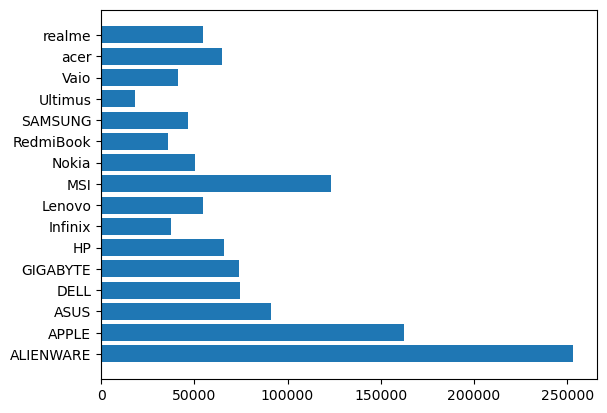

<Figure size 20000x20000 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('Company')['MRP'].mean().reset_index()
plt.barh(grouped_data['Company'], grouped_data['MRP'])
plt.figure(figsize=(200, 200))

In [51]:
print("MRP")
print("Minimum :", df['MRP'].min())
print("Maximum :", df['MRP'].max())
print("Mean :", df['MRP'].mean())
print("Median :", df['MRP'].median())
print("Standard Deviation :", df['MRP'].std())

MRP
Minimum : 14990.0
Maximum : 434830.0
Mean : 81363.63
Median : 61490.0
Standard Deviation : 62584.1640625


<Axes: >

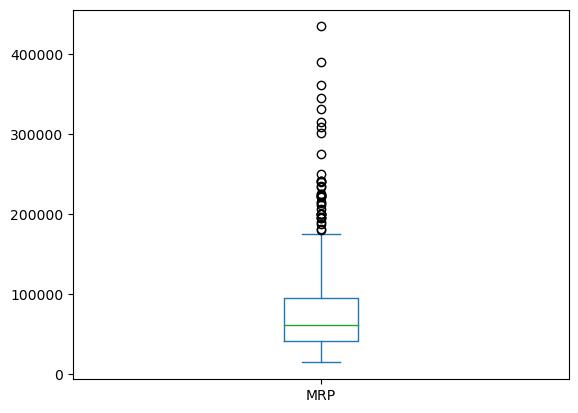

In [52]:
df['MRP'].plot(kind='box')

<Axes: xlabel='count', ylabel='RAM_Size'>

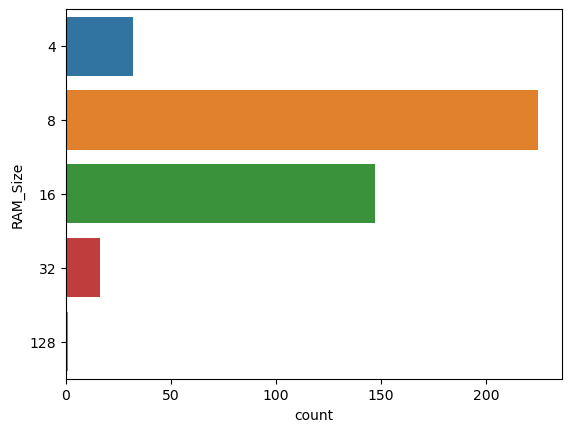

In [53]:
sns.countplot( y = "RAM_Size" , data = df)


Text(0.5, 1.0, 'RAM Size vs MRP')

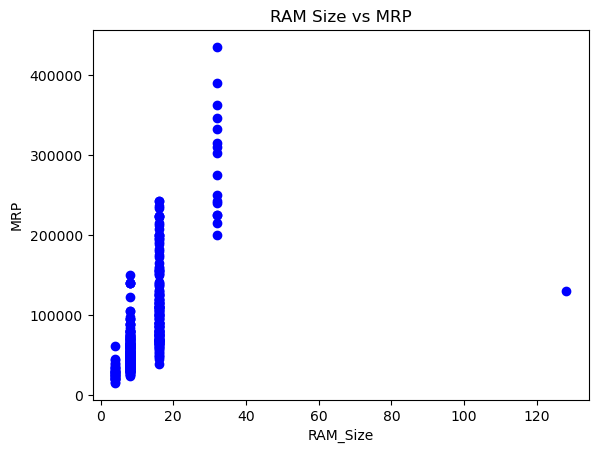

In [54]:
plt.scatter(df["RAM_Size"], df["MRP"], label="RAM Size vs MRP ", color="blue")

# Add labels and title to the plot
plt.xlabel("RAM_Size")
plt.ylabel("MRP")
plt.title("RAM Size vs MRP")



Observation: Greater the RAM_Size, more is the price

<Figure size 20000x20000 with 0 Axes>

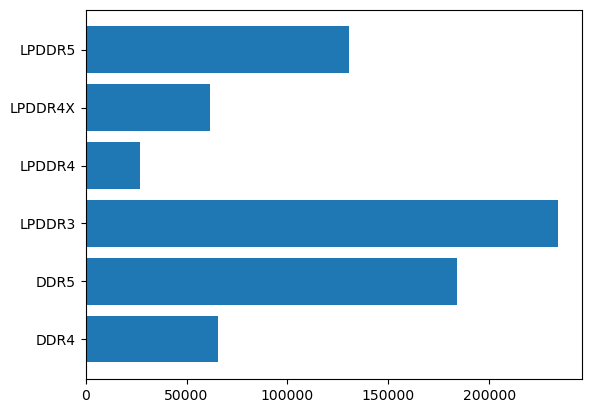

<Figure size 20000x20000 with 0 Axes>

In [55]:
grouped_data = df.groupby('RAM_Gen')['MRP'].mean().reset_index()
plt.barh(grouped_data['RAM_Gen'], grouped_data['MRP'])
plt.figure(figsize=(200, 200))


<Figure size 20000x20000 with 0 Axes>

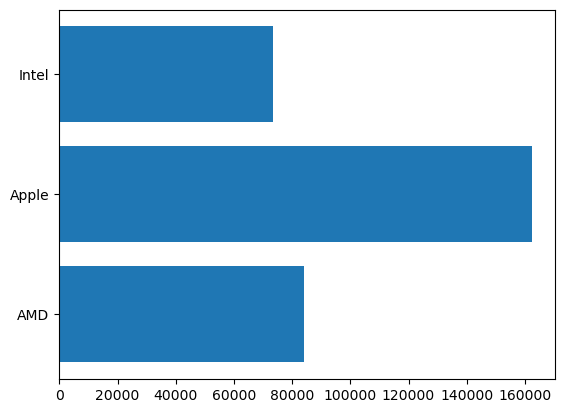

<Figure size 20000x20000 with 0 Axes>

In [56]:
grouped_data = df.groupby('Processor_Brand')['MRP'].mean().reset_index()
plt.barh(grouped_data['Processor_Brand'], grouped_data['MRP'])
plt.figure(figsize=(200, 200))

Observation: Apple is the costliest processor

Text(0.5, 1.0, 'Storage_Size VS MRP')

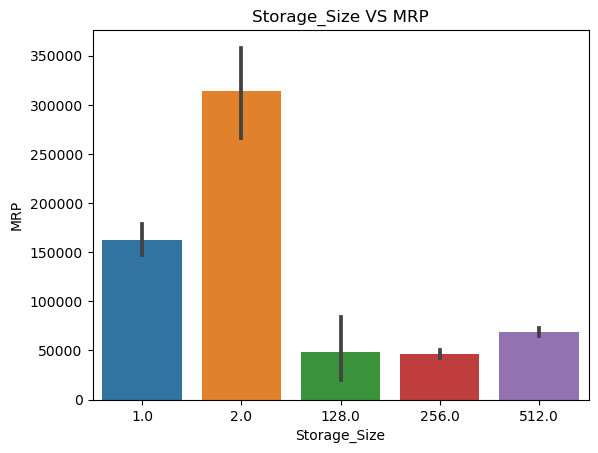

In [57]:
sns.barplot(x='Storage_Size', y ='MRP', data=df)
plt.title("Storage_Size VS MRP")

Text(0.5, 1.0, 'Display(inches) VS MRP')

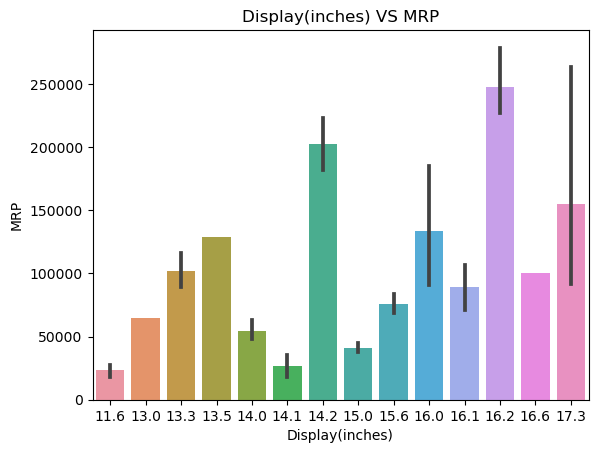

In [58]:
sns.barplot(x='Display(inches)', y ='MRP', data=df)
plt.title("Display(inches) VS MRP")

In [59]:
# Observation: Display column is not giving accurate information

<Figure size 20000x20000 with 0 Axes>

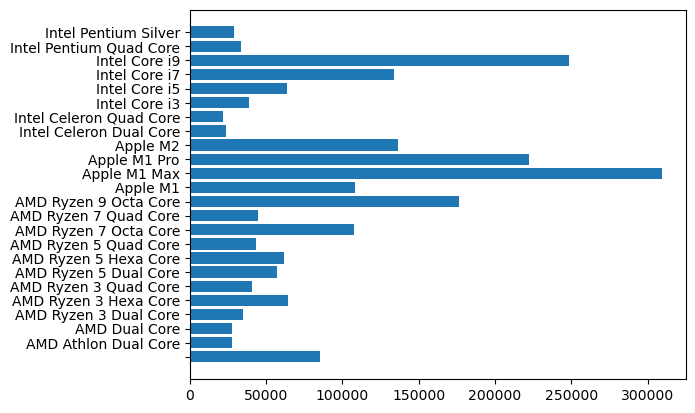

<Figure size 20000x20000 with 0 Axes>

In [60]:
grouped_data = df.groupby('Processor_Type')['MRP'].mean().reset_index()
plt.barh(grouped_data['Processor_Type'], grouped_data['MRP'])
plt.figure(figsize=(200, 200))

In [61]:
df_new = df[['Company','Processor_Brand','RAM_Size','RAM_Gen','Storage_Size','Storage_type','OS_Type','MRP']]

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1206297835.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), cmap="Greens" , annot= True)


<Axes: >

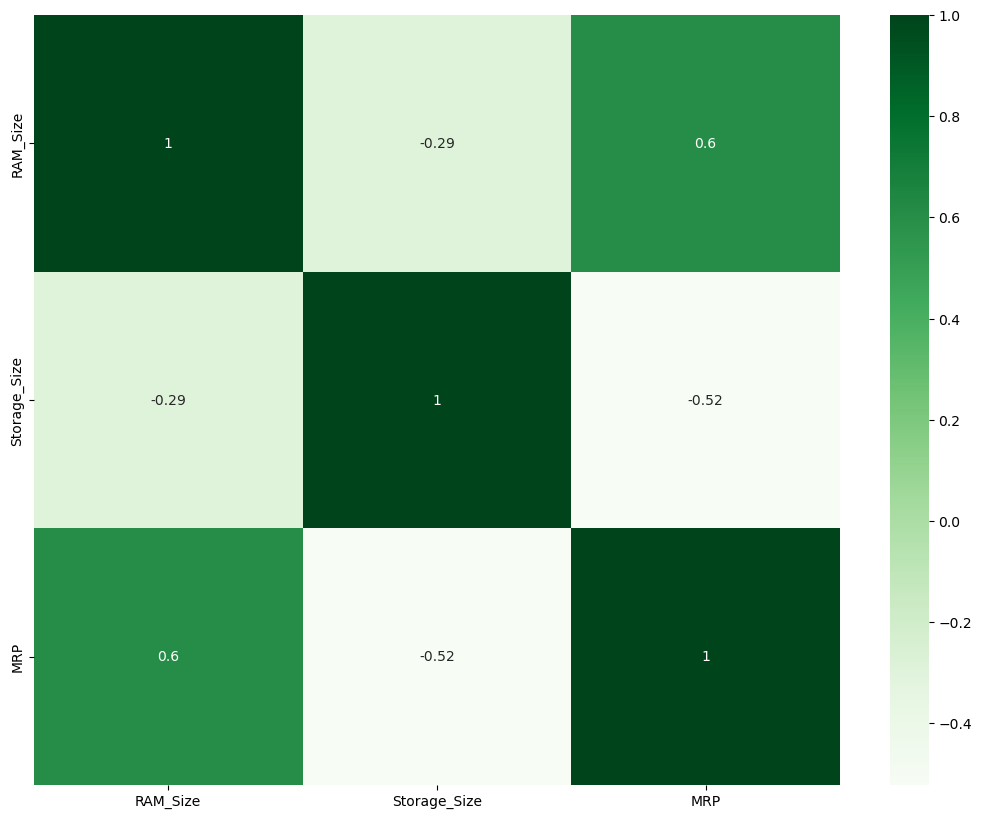

In [62]:
plt.figure(figsize = (13,10))
sns.heatmap(df_new.corr(), cmap="Greens" , annot= True)


Observation : RAM_Size is more related to MRP

In [63]:
df_new.head()

,Company,Processor_Brand,RAM_Size,RAM_Gen,Storage_Size,Storage_type,OS_Type,MRP
0,Lenovo,Intel,8,DDR4,256.0,SSD,Windows,36990.0
1,Lenovo,Intel,8,DDR4,512.0,SSD,Windows,39990.0
2,ASUS,Intel,8,DDR4,512.0,SSD,Windows,32990.0
3,HP,AMD,8,DDR4,512.0,SSD,Windows,49990.0
4,ASUS,Intel,8,DDR4,512.0,SSD,Windows,49990.0


In [64]:
missing_percentage = (df_new.isnull().sum() / len(df)) * 100
missing_percentage

Company            0.000000
Processor_Brand    7.125891
RAM_Size           0.000000
RAM_Gen            3.087886
Storage_Size       5.463183
Storage_type       0.000000
OS_Type            0.000000
MRP                0.000000
dtype: float64

In [65]:
df_new[['Processor_Brand','RAM_Gen','Storage_Size']].mode()

,Processor_Brand,RAM_Gen,Storage_Size
0,Intel,DDR4,512.0


In [66]:
df_new['Processor_Brand'].fillna(df_new['Processor_Brand'].mode()[0], inplace=True)
df_new['RAM_Gen'].fillna(df_new['RAM_Gen'].mode()[0], inplace=True)
df_new['Storage_Size'].fillna(df_new['Storage_Size'].mode()[0], inplace=True)

C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1868886109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Processor_Brand'].fillna(df_new['Processor_Brand'].mode()[0], inplace=True)
C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1868886109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RAM_Gen'].fillna(df_new['RAM_Gen'].mode()[0], inplace=True)
C:\Users\Deekshitha\AppData\Local\Temp\ipykernel_11692\1868886109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [67]:
missing_percentage = (df_new.isnull().sum() / len(df)) * 100
missing_percentage

Company            0.0
Processor_Brand    0.0
RAM_Size           0.0
RAM_Gen            0.0
Storage_Size       0.0
Storage_type       0.0
OS_Type            0.0
MRP                0.0
dtype: float64

## Splitting the data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,0:7],df_new.iloc[:,-1], test_size=0.25,random_state=10)

In [69]:
print("Shape of X_train" ,X_train.shape)
print("Shape of X_test" ,X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (315, 7)
Shape of X_test (106, 7)
Shape of y_train (315,)
Shape of y_test (106,)


## Categorical Columns

In [70]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
X_train['Company'] = le.fit_transform(X_train['Company'])
X_test['Company'] = le.transform(X_test['Company'])

X_train['Processor_Brand'] = le.fit_transform(X_train['Processor_Brand'])
X_test['Processor_Brand'] = le.transform(X_test['Processor_Brand'])

X_train['RAM_Gen'] = le.fit_transform(X_train['RAM_Gen'])
X_test['RAM_Gen'] = le.transform(X_test['RAM_Gen'])

X_train['Storage_type'] = le.fit_transform(X_train['Storage_type'])
X_test['Storage_type'] = le.transform(X_test['Storage_type'])

X_train['OS_Type'] = le.fit_transform(X_train['OS_Type'])
X_test['OS_Type'] = le.transform(X_test['OS_Type'])

In [72]:
X_train

,Company,Processor_Brand,RAM_Size,RAM_Gen,Storage_Size,Storage_type,OS_Type
128,2,2,8,0,512.0,1,1
94,3,2,8,0,256.0,1,1
213,3,2,8,0,512.0,1,1
689,0,2,16,0,512.0,1,1
10,5,0,8,0,512.0,1,1
...,...,...,...,...,...,...,...
628,0,2,32,0,1.0,1,1
534,14,2,16,1,1.0,1,1
15,2,0,16,1,1.0,1,1
184,8,2,16,0,512.0,1,1


## Numerical Columns

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [74]:
X_train[['RAM_Size','Storage_Size']] = sc.fit_transform(X_train[['RAM_Size','Storage_Size']])
X_test[['RAM_Size','Storage_Size']] = sc.transform(X_test[['RAM_Size','Storage_Size']])

In [75]:
X_train

,Company,Processor_Brand,RAM_Size,RAM_Gen,Storage_Size,Storage_type,OS_Type
128,2,2,0.032258,0,1.000000,1,1
94,3,2,0.032258,0,0.499022,1,1
213,3,2,0.032258,0,1.000000,1,1
689,0,2,0.096774,0,1.000000,1,1
10,5,0,0.032258,0,1.000000,1,1
...,...,...,...,...,...,...,...
628,0,2,0.225806,0,0.000000,1,1
534,14,2,0.096774,1,0.000000,1,1
15,2,0,0.096774,1,0.000000,1,1
184,8,2,0.096774,0,1.000000,1,1


In [76]:
np.round(X_train['RAM_Size'].describe(),1)

count    315.0
mean       0.1
std        0.1
min        0.0
25%        0.0
50%        0.0
75%        0.1
max        1.0
Name: RAM_Size, dtype: float64

### X_test

# Fitting into Models

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
M1 = LinearRegression()

In [78]:
M1 = M1.fit(X_train, y_train)

In [79]:
y_pred = M1.predict(X_test)

In [80]:
from sklearn.metrics import  r2_score,  mean_squared_error as mse
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [81]:
evaluation = pd.DataFrame({"Model" : ['Linear Regression'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]})

In [82]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086


### KNN

In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor( n_neighbors=3 )
knn = knn.fit(X_train,y_train)

In [84]:
y_pred = knn.predict(X_test)

In [85]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_knn = pd.DataFrame({"Model" : ['KNN'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_knn])

In [86]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086
0,KNN,2.529530e+09,50294.433594,0.343092


### Decision Tree Regression

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [89]:
MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_dec = pd.DataFrame({"Model" : ['Decision_Tree'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_dec])

In [90]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086
0,KNN,2.529530e+09,50294.433594,0.343092
0,Decision_Tree,9.815141e+08,31329.125540,0.745105


### RandomForest Regression

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf=RandomForestRegressor(n_estimators = 10, max_depth = 12, random_state = 3)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [93]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_ran = pd.DataFrame({"Model" : ['Random Forest'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_ran])

In [94]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086
0,KNN,2.529530e+09,50294.433594,0.343092
0,Decision_Tree,9.815141e+08,31329.125540,0.745105
0,Random Forest,9.160876e+08,30266.938676,0.762096


In [95]:
from sklearn.ensemble import AdaBoostRegressor

In [96]:
ada_boost=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada_boost.fit(X_train,y_train)
y_pred=ada_boost.predict(X_test)

In [97]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation = pd.concat([evaluation,pd.DataFrame({"Model" : ['ADA_Boost'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )])

In [98]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086
0,KNN,2.529530e+09,50294.433594,0.343092
0,Decision_Tree,9.815141e+08,31329.125540,0.745105
0,Random Forest,9.160876e+08,30266.938676,0.762096
0,ADA_Boost,8.191893e+08,28621.483768,0.787260


### XG_Boost

In [99]:
from xgboost import XGBRegressor

In [100]:
xgb=XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=98) 
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [101]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation = pd.concat([evaluation, pd.DataFrame({"Model" : ['XG_Boost'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )])

In [102]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.563039e+09,39535.286031,0.594086
0,KNN,2.529530e+09,50294.433594,0.343092
0,Decision_Tree,9.815141e+08,31329.125540,0.745105
0,Random Forest,9.160876e+08,30266.938676,0.762096
0,ADA_Boost,8.191893e+08,28621.483768,0.787260
0,XG_Boost,1.091067e+09,33031.308594,0.716655


In [103]:
# Observation: Ada_Boost Model has lowest RMSE and Highest R2_Score
## So this model is suitable

### K Fold Cross Validation

In [104]:
from sklearn.model_selection import KFold
model=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
kfold_validation = KFold(10)

In [105]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(model,X_test,y_test,cv=kfold_validation)

In [106]:
print(res)
print("Mean result:", np.mean(res))

[0.41586975 0.48363193 0.5806097  0.44951992 0.61923486 0.72428159
 0.54305108 0.69360644 0.34750791 0.51747802]
Mean result: 0.5374791197481055


## Real Time Prediction

In [107]:
Company = "Lenovo"
Processor_Brand =  "Intel"
RAM_Size = 8
RAM_Gen = "DDR4"
Storage_Size = 512.0
Storage_type = "SSD"
OS_Type = "Windows"

In [108]:
d = pd.DataFrame({"Company" : [Company], "Processor_Brand" : [Processor_Brand], 'RAM_Size':[RAM_Size] , 'RAM_Gen': [RAM_Gen], 'Storage_Size': [Storage_Size], 'Storage_type': [Storage_type], 'OS_Type': [OS_Type]})

In [109]:
d['Company'] = le.fit_transform(d['Company'])

d['Processor_Brand'] = le.fit_transform(d['Processor_Brand'])

d['RAM_Gen'] = le.fit_transform(d['RAM_Gen'])

d['Storage_type'] = le.fit_transform(d['Storage_type'])

d['OS_Type'] = le.fit_transform(d['OS_Type'])

In [110]:
d[['RAM_Size','Storage_Size']] = sc.transform(d[['RAM_Size','Storage_Size']])

In [111]:
ada_boost.predict(d)

array([122790.])

## Loading Scaler object in the Model

In [112]:
ada_boost.scaler = sc

# Save the model

In [113]:
import pickle

In [114]:
pickle.dump(ada_boost, open("LaptopPrice_prediction.pkl","wb"))

In [115]:
pickle.dump(sc, open('scaler.pkl', 'wb'))